# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

## Create New Features

### MEMBERS dataset

In [2]:
MEMBERS = pd.read_csv("../data/processed/MEMBERS_TRAIN.csv", parse_dates=True)

In [3]:
MEMBERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49716 entries, 0 to 49715
Data columns (total 6 columns):
msno                      49716 non-null object
registration_init_time    47498 non-null object
city                      47498 non-null float64
bd                        47498 non-null float64
gender                    32699 non-null object
registered_via            47498 non-null float64
dtypes: float64(3), object(3)
memory usage: 2.3+ MB


In [4]:
MEMBERS.head()

,msno,registration_init_time,city,bd,gender,registered_via
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,2011-07-21,13.0,25.0,female,9.0
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,2015-11-20,9.0,21.0,female,4.0
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,2005-08-08,17.0,43.0,female,9.0
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,2011-11-10,15.0,20.0,male,9.0
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,2010-11-02,5.0,29.0,male,7.0


In [5]:
MEMBERS.describe()

,city,bd,registered_via
count,47498.000000,47498.000000,47498.000000
mean,7.830224,18.578172,6.315655
std,6.439950,32.765687,2.820550
min,1.000000,-5978.000000,3.000000
25%,1.000000,0.000000,3.000000
50%,5.000000,21.000000,7.000000
75%,13.000000,28.000000,9.000000
max,22.000000,1032.000000,13.000000


In [6]:
MEMBERS[MEMBERS.isna() == True]

,msno,registration_init_time,city,bd,gender,registered_via
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
MEMBERS["gender"] = MEMBERS["gender"].fillna(value="Unknown")
MEMBERS = MEMBERS.dropna()

There are 3 kind of data in `bd` column:
1. Lay in 0 - 100 norm range, we regard them as correct data
2. Less than 0, negative age, which is absolutly wrong.
3. Larger than 100, 

In [8]:
MEMBERS[((MEMBERS["bd"] < 5) | (MEMBERS["bd"] > 100)) & (MEMBERS["bd"] != 0)]

,msno,registration_init_time,city,bd,gender,registered_via
270,+Jj5/ZOOEjxBVLvcSCl6LqKdyZt60Wlsm8VY2wdHerk=,2015-01-25,5.0,-40.0,Unknown,9.0
729,+x4R6dxRjzGxmYIBuQN/xP8NR8b0YoTAA1uPHrmTJjg=,2009-11-18,14.0,950.0,male,9.0
1078,/NDwhRho466jiCe0pVGVVaNviegNGaFwT5x4XHhooww=,2005-12-30,10.0,116.0,female,9.0
1096,/OXkzR+O40TKe9U63gRLRlSIsnsgXNhq+sucTJyklBU=,2016-01-09,5.0,1.0,male,9.0
1847,0OGAvfUTnQsLqfZEjwRzW4EoNwl16+4qQpz/x4H9exc=,2015-04-27,14.0,112.0,male,3.0
2269,0wBs+OMqUANNM9zzG+nk8eI7Y2Dy/glSUCo1SHWNShk=,2006-03-11,15.0,104.0,male,9.0
2676,1TrRBj51BTK2pH9l3cQ4QNBCWZOt5hcvCOFQG2YeBm4=,2016-08-07,22.0,102.0,female,4.0
4742,44t3seCQpB4ZONjgI1S3W65eaf4jT1KM+eKqdftgrZk=,2015-03-19,15.0,-10.0,Unknown,9.0
5174,4aRFGkKzGUpqTbjojytAtRQNdx0egL02hjJhSqq0+NA=,2016-02-16,1.0,103.0,female,3.0
5941,5bmZckKqqHezMrfzvUt7obz2EjuekJxcieo0Xkuu7EI=,2016-05-18,13.0,112.0,male,4.0


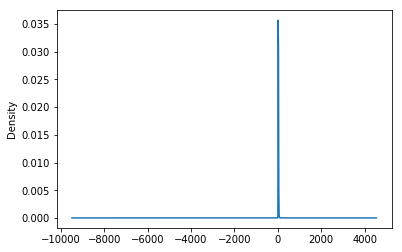

In [9]:
MEMBERS[MEMBERS["bd"] != 0].bd.plot.density()

In [10]:
MEMBERS["info_complete"] = ((MEMBERS["bd"] > 5) & (MEMBERS["bd"] < 100)) & (MEMBERS["gender"] != "Unknown")

In [11]:
MEMBERS["info_complete"].describe()

count     47498
unique        2
top        True
freq      31754
Name: info_complete, dtype: object

In [12]:
MEMBERS["bd"][(MEMBERS["bd"] < 5) | (MEMBERS["bd"] > 100)] = MEMBERS["bd"][(MEMBERS["bd"] > 5) & (MEMBERS["bd"] < 100)].mean()

C:\Users\zimingliu2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
MEMBERS["reg_Year"] = MEMBERS["registration_init_time"].map(lambda x: int(x[:4]))

In [14]:
MEMBERS["reg_Year"].head()

0    2011
1    2015
2    2005
3    2011
4    2010
Name: reg_Year, dtype: int64

In [15]:
MEMBERS['registration_init_time'] = MEMBERS['registration_init_time'].map(lambda x: datetime(int(x[:4]), int(x[5:7]), int(x[8:])))

In [16]:
MEMBERS['cur_date'] = datetime(2017, 2, 28)
MEMBERS.head()

,msno,registration_init_time,city,bd,gender,registered_via,info_complete,reg_Year,cur_date
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,2011-07-21,13.0,25.0,female,9.0,True,2011,2017-02-28
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,2015-11-20,9.0,21.0,female,4.0,True,2015,2017-02-28
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,2005-08-08,17.0,43.0,female,9.0,True,2005,2017-02-28
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,2011-11-10,15.0,20.0,male,9.0,True,2011,2017-02-28
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,2010-11-02,5.0,29.0,male,7.0,True,2010,2017-02-28


In [17]:
MEMBERS['registration_duration'] = MEMBERS['cur_date'] - MEMBERS['registration_init_time']
MEMBERS['registration_duration'] = MEMBERS['registration_duration'].map(lambda x: x / timedelta(days=1))

In [18]:
city_noimportant_index = ((MEMBERS["city"] != 1) &
                         (MEMBERS["city"] != 4) &
                          (MEMBERS["city"] != 5) &
                          (MEMBERS["city"] != 13) &
                          (MEMBERS["city"] != 15) &
                          (MEMBERS["city"] != 22)
                         )
MEMBERS["city"][city_noimportant_index] = 0

C:\Users\zimingliu2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
regist_noimportant_index = ((MEMBERS["registered_via"] != 7) &
                         (MEMBERS["registered_via"] != 9) &
                          (MEMBERS["registered_via"] != 3) &
                          (MEMBERS["registered_via"] != 4)
                         )
MEMBERS["registered_via"][regist_noimportant_index] = 0

C:\Users\zimingliu2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
city_col = MEMBERS["city"]
city_col = city_col.sort_values()
city_col_dummy = pd.get_dummies(city_col, drop_first=True, prefix="city")
city_col_dummy.head()

,city_1.0,city_4.0,city_5.0,city_13.0,city_15.0,city_22.0
49715,0,0,0,0,0,0
11949,0,0,0,0,0,0
11952,0,0,0,0,0,0
32839,0,0,0,0,0,0
11955,0,0,0,0,0,0


In [21]:
reg_col = MEMBERS["registered_via"]
reg_col = reg_col.sort_values()
reg_col_dummy = pd.get_dummies(reg_col, drop_first=True, prefix="regVia")
reg_col_dummy.head()

,regVia_3.0,regVia_4.0,regVia_7.0,regVia_9.0
37667,0,0,0,0
48017,0,0,0,0
4722,0,0,0,0
26519,0,0,0,0
24158,0,0,0,0


In [22]:
MEMBERS = pd.merge(left=MEMBERS, right=city_col_dummy, left_index=True, right_index=True)

In [23]:
MEMBERS = pd.merge(left=MEMBERS, right=reg_col_dummy, left_index=True, right_index=True)

In [24]:
MEMBERS = MEMBERS.drop(labels=["registration_init_time", "city", "registered_via", "cur_date"], axis=1)

In [25]:
MEMBERS.head()

,msno,bd,gender,info_complete,reg_Year,registration_duration,city_1.0,city_4.0,city_5.0,city_13.0,city_15.0,city_22.0,regVia_3.0,regVia_4.0,regVia_7.0,regVia_9.0
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,25.0,female,True,2011,2049.0,0,0,0,1,0,0,0,0,0,1
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,21.0,female,True,2015,466.0,0,0,0,0,0,0,0,1,0,0
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,43.0,female,True,2005,4222.0,0,0,0,0,0,0,0,0,0,1
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,20.0,male,True,2011,1937.0,0,0,0,0,1,0,0,0,0,1
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,29.0,male,True,2010,2310.0,0,0,1,0,0,0,0,0,1,0


### STATUS dataset

In [26]:
STATUS = pd.read_csv("../data/raw/STATUS_02.csv")

In [27]:
STATUS.head()

,msno,status
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,1
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,1
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,1
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,1


In [28]:
STATUS['status'] = STATUS['status'].astype(str)
STATUS['status'].value_counts()

1    31577
0    18139
Name: status, dtype: int64

### TRANSACTION dataset

In [29]:
TRANSACTION = pd.read_csv("../data/processed/TRANSACTION_TRAIN.csv")

In [30]:
TRANSACTION.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,Exp_Year,Exp_Month
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,38,410,1788,1788,0,2015-11-22,2017-01-05,0,2017,1
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,38,30,149,149,0,2015-11-28,2015-12-28,0,2015,12
2,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,38,30,149,149,0,2016-01-07,2016-02-06,0,2016,2
3,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,38,30,149,149,0,2016-05-17,2016-06-16,0,2016,6
4,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,38,30,149,149,0,2016-08-16,2016-09-15,0,2016,9


In [31]:
Not_monthly_sub = TRANSACTION[(TRANSACTION['payment_plan_days'] != 30) & (TRANSACTION['payment_plan_days'] != 31)]

In [32]:
Not_monthly_sub['payment_plan_days'].astype(str)
Not_monthly_sub.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,Exp_Year,Exp_Month
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,38,410,1788,1788,0,2015-11-22,2017-01-05,0,2017,1
9,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,38,0,0,149,0,2015-05-02,2015-06-01,0,2015,6
13,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,38,7,0,0,0,2016-12-27,2017-01-03,0,2017,1
14,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-03-31,2015-04-30,0,2015,4
15,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-06-30,2015-07-31,0,2015,7


In [33]:
from datetime import datetime
from datetime import timedelta

TRANSACTION['transaction_date'] = TRANSACTION['transaction_date'].map(lambda x: datetime(int(x[:4]), int(x[5:7]), int(x[8:])))
TRANSACTION['membership_expire_date'] = TRANSACTION['membership_expire_date'].map(lambda x: datetime(int(x[:4]), int(x[5:7]), int(x[8:])))

In [34]:
TRANSACTION['membership_duration'] = TRANSACTION['membership_expire_date'] - TRANSACTION['transaction_date']

In [35]:
TRANSACTION['membership_duration'] = TRANSACTION['membership_duration'].map(lambda x: x / timedelta(days=1))

In [36]:
TRANSACTION[TRANSACTION['payment_plan_days'] != TRANSACTION['membership_duration']]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,Exp_Year,Exp_Month,membership_duration
9,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,38,0,0,149,0,2015-05-02,2015-06-01,0,2015,6,30.0
14,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-03-31,2015-04-30,0,2015,4,30.0
15,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-06-30,2015-07-31,0,2015,7,31.0
16,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-07-31,2015-08-31,0,2015,8,31.0
17,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-08-31,2015-09-30,0,2015,9,30.0
18,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-09-30,2015-10-31,0,2015,10,31.0
19,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-10-31,2015-11-30,0,2015,11,30.0
20,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,30,149,149,1,2015-11-30,2015-12-31,0,2015,12,31.0
21,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,30,149,149,1,2015-12-31,2016-01-31,0,2016,1,31.0
22,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,30,149,149,1,2016-01-31,2016-02-29,0,2016,2,29.0


In [37]:
TRANSACTION[TRANSACTION["plan_list_price"] != TRANSACTION["actual_amount_paid"]]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,Exp_Year,Exp_Month,membership_duration
9,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,38,0,0,149,0,2015-05-02,2015-06-01,0,2015,6,30.0
14,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-03-31,2015-04-30,0,2015,4,30.0
15,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-06-30,2015-07-31,0,2015,7,31.0
16,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-07-31,2015-08-31,0,2015,8,31.0
17,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-08-31,2015-09-30,0,2015,9,30.0
18,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-09-30,2015-10-31,0,2015,10,31.0
19,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,31,0,0,149,1,2015-10-31,2015-11-30,0,2015,11,30.0
53,+/0rt5UcoaXHYaPjs19hcfE6kc0iwzbQ0CvQEU5GTB4=,40,31,149,0,1,2015-02-06,2015-03-05,0,2015,3,27.0
54,+/0rt5UcoaXHYaPjs19hcfE6kc0iwzbQ0CvQEU5GTB4=,40,31,149,0,1,2015-03-06,2015-03-05,1,2015,3,-1.0
61,+/3y+kPYUo7hVOhqU7zDnyGx5VqmA/KqPtP5OPJTUIM=,27,0,0,149,1,2015-04-27,2015-05-26,0,2015,5,29.0


In [38]:
TRANSACTION['pay_id:is_auto_renew'] = TRANSACTION['payment_method_id'] * TRANSACTION['is_auto_renew']

In [39]:
TRANSACTION['is_auto_renew:is_cancel'] = TRANSACTION['is_cancel'] * TRANSACTION['is_auto_renew']

In [40]:
TRANSACTION['is_auto_renew:not_cancel'] = ((TRANSACTION.is_auto_renew == 1) & (TRANSACTION.is_cancel == 0)).astype(np.int8)

In [41]:
TRANSACTION['not_auto_renew:is_cancel'] = ((TRANSACTION.is_auto_renew == 0) & (TRANSACTION.is_cancel == 1)).astype(np.int8)

In [42]:
TRANSACTION['payment_increase'] = 0
temp_index = (TRANSACTION['plan_list_price'] < TRANSACTION['actual_amount_paid']).copy()
TRANSACTION['payment_increase'][temp_index] = 1

C:\Users\zimingliu2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
TRANSACTION['payment_decrease'] = 0
temp_index = (TRANSACTION['plan_list_price'] > TRANSACTION['actual_amount_paid']).copy()
TRANSACTION['payment_decrease'][temp_index] = 1

C:\Users\zimingliu2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
TRANSACTION['payment_tozero'] = 0
temp_index = ((TRANSACTION['plan_list_price'] != 0) & (TRANSACTION['actual_amount_paid'] == 0)).copy()
TRANSACTION['payment_tozero'][temp_index] = 1

C:\Users\zimingliu2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
TRANSACTION['new_payer'] = 0
temp_index = ((TRANSACTION['plan_list_price'] == 0) & (TRANSACTION['actual_amount_paid'] != 0)).copy()
TRANSACTION['new_payer'][temp_index] = 1

C:\Users\zimingliu2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
TRANSACTION['discount'] = TRANSACTION['plan_list_price'] - TRANSACTION['actual_amount_paid']
TRANSACTION['discount'].unique()

array([    0,  -149,   149,  -894,  -150,  -129, -1788,    30,  -300,
        -447,  -119,  -100,   120,  -536,    50,   -35,  -500, -1000,
        -480,    20, -1599,     1,  -799,  -350,  -105,   180,  -930,
          -1,  -450], dtype=int64)

In [47]:
payment_noimportant_index = ((TRANSACTION["payment_method_id"] != 41) &
                             (TRANSACTION["payment_method_id"] != 40) &
                             (TRANSACTION["payment_method_id"] != 39) &
                             (TRANSACTION["payment_method_id"] != 38) &
                             (TRANSACTION["payment_method_id"] != 37) &
                             (TRANSACTION["payment_method_id"] != 36) &
                             (TRANSACTION["payment_method_id"] != 34)
                         )
TRANSACTION["payment_method_id"][payment_noimportant_index] = 0

C:\Users\zimingliu2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
payment_col = TRANSACTION["payment_method_id"]
payment_col = city_col.sort_values()
payment_col_dummy = pd.get_dummies(payment_col, drop_first=True, prefix="paymentId")
payment_col_dummy.head()

,paymentId_1.0,paymentId_4.0,paymentId_5.0,paymentId_13.0,paymentId_15.0,paymentId_22.0
49715,0,0,0,0,0,0
2475,0,0,0,0,0,0
41977,0,0,0,0,0,0
5434,0,0,0,0,0,0
41972,0,0,0,0,0,0


In [49]:
TRANSACTION = pd.merge(left=TRANSACTION, right=payment_col_dummy, left_index=True, right_index=True)

In [50]:
TRANSACTION.columns

Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'Exp_Year', 'Exp_Month',
       'membership_duration', 'pay_id:is_auto_renew',
       'is_auto_renew:is_cancel', 'is_auto_renew:not_cancel',
       'not_auto_renew:is_cancel', 'payment_increase', 'payment_decrease',
       'payment_tozero', 'new_payer', 'discount', 'paymentId_1.0',
       'paymentId_4.0', 'paymentId_5.0', 'paymentId_13.0', 'paymentId_15.0',
       'paymentId_22.0'],
      dtype='object')

In [51]:
TRANSACTION = TRANSACTION.drop(labels=['payment_method_id', 'transaction_date', 'membership_expire_date',], axis=1)

In [52]:
TRANSACTION.columns

Index(['msno', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid',
       'is_auto_renew', 'is_cancel', 'Exp_Year', 'Exp_Month',
       'membership_duration', 'pay_id:is_auto_renew',
       'is_auto_renew:is_cancel', 'is_auto_renew:not_cancel',
       'not_auto_renew:is_cancel', 'payment_increase', 'payment_decrease',
       'payment_tozero', 'new_payer', 'discount', 'paymentId_1.0',
       'paymentId_4.0', 'paymentId_5.0', 'paymentId_13.0', 'paymentId_15.0',
       'paymentId_22.0'],
      dtype='object')

In [53]:
TRAN_THIS_MONTH = TRANSACTION[['msno', 'payment_plan_days', 'plan_list_price', 
                               'actual_amount_paid','is_cancel', 'discount']][(TRANSACTION['Exp_Year'] == 2017) &
                                                                              (TRANSACTION['Exp_Month'] == 1)]
TRAN_THIS_MONTH = TRAN_THIS_MONTH.groupby(by=["msno"], as_index=False).max()

In [54]:
TRAN_SUM = TRANSACTION[['msno','is_auto_renew', 'is_cancel', 'actual_amount_paid',
                        'membership_duration', 'pay_id:is_auto_renew',
                        'is_auto_renew:is_cancel', 'is_auto_renew:not_cancel',
                        'not_auto_renew:is_cancel', 'payment_increase', 'payment_decrease',
                        'payment_tozero', 'new_payer', 'discount', 'paymentId_1.0', 'paymentId_4.0',
                        'paymentId_5.0', 'paymentId_13.0', 'paymentId_15.0', 'paymentId_22.0']]
TRAN_SUM = TRAN_SUM.groupby(by=["msno"], as_index=False).sum()

In [55]:
TRAN_SUM.head()

,msno,is_auto_renew,is_cancel,actual_amount_paid,membership_duration,pay_id:is_auto_renew,is_auto_renew:is_cancel,is_auto_renew:not_cancel,not_auto_renew:is_cancel,payment_increase,payment_decrease,payment_tozero,new_payer,discount,paymentId_1.0,paymentId_4.0,paymentId_5.0,paymentId_13.0,paymentId_15.0,paymentId_22.0
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,0,0,1788,410.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,0,0,1043,210.0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,0,0,745,157.0,0,0,0,0,1,0,0,1,-149,2,0,1,1,0,2
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,18,1,3129,609.0,558,1,17,0,6,0,0,6,-894,9,0,0,3,1,3
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,0,0,1200,360.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [56]:
TRANSACTION_featured = pd.merge(left=TRAN_THIS_MONTH, right=TRAN_SUM, left_on="msno", right_on="msno", suffixes=("_last_month", "_sum"))

In [57]:
TRANSACTION_featured.columns

Index(['msno', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid_last_month', 'is_cancel_last_month',
       'discount_last_month', 'is_auto_renew', 'is_cancel_sum',
       'actual_amount_paid_sum', 'membership_duration', 'pay_id:is_auto_renew',
       'is_auto_renew:is_cancel', 'is_auto_renew:not_cancel',
       'not_auto_renew:is_cancel', 'payment_increase', 'payment_decrease',
       'payment_tozero', 'new_payer', 'discount_sum', 'paymentId_1.0',
       'paymentId_4.0', 'paymentId_5.0', 'paymentId_13.0', 'paymentId_15.0',
       'paymentId_22.0'],
      dtype='object')

In [58]:
TRANSACTION_featured['amt_per_day'] = TRANSACTION_featured['actual_amount_paid_sum'] / TRANSACTION_featured['membership_duration']
TRANSACTION_featured['amt_per_day'].unique()

array([4.36097561, 4.96666667, 4.74522293, ..., 5.47164948, 5.07317073,
       4.25151515])

In [59]:
mean_amt_per_day = TRANSACTION_featured["amt_per_day"][TRANSACTION_featured["amt_per_day"].isna() == False].mean()
TRANSACTION_featured["amt_per_day"] = TRANSACTION_featured["amt_per_day"].fillna(value=mean_amt_per_day)

### Merging dataframes (transactions and members)

In [60]:
TRANSACTION_sub = TRANSACTION[['msno', 'actual_amount_paid', 'membership_duration']]
TRANSACTION_sub = TRANSACTION_sub.groupby(by=["msno"], as_index=False).sum()

In [61]:
MEMBERS = pd.merge(MEMBERS, TRANSACTION_sub, on='msno', how='inner')

In [62]:
MEMBERS['reg_mem_duration'] = MEMBERS['registration_duration'] - MEMBERS['membership_duration']

In [63]:
MEMBERS['reg_mem_prect'] = MEMBERS['membership_duration'] / MEMBERS['registration_duration']

In [64]:
MEMBERS['long_time_user'] = (MEMBERS['registration_duration'] > 365).astype(int)

In [65]:
MEMBERS.head()

,msno,bd,gender,info_complete,reg_Year,registration_duration,city_1.0,city_4.0,city_5.0,city_13.0,...,city_22.0,regVia_3.0,regVia_4.0,regVia_7.0,regVia_9.0,actual_amount_paid,membership_duration,reg_mem_duration,reg_mem_prect,long_time_user
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,25.0,female,True,2011,2049.0,0,0,0,1,...,0,0,0,0,1,1788,410.0,1639.0,0.200098,1
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,21.0,female,True,2015,466.0,0,0,0,0,...,0,0,1,0,0,1043,210.0,256.0,0.450644,1
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,43.0,female,True,2005,4222.0,0,0,0,0,...,0,0,0,0,1,745,157.0,4065.0,0.037186,1
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,20.0,male,True,2011,1937.0,0,0,0,0,...,0,0,0,0,1,3129,609.0,1328.0,0.314404,1
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,29.0,male,True,2010,2310.0,0,0,1,0,...,0,0,0,1,0,1200,360.0,1950.0,0.155844,1


## USER_LOGS dataset

In [66]:
USER_LOGS = pd.read_csv("../data/processed/USER_LOGS_TRAIN.csv")

In [67]:
USER_LOGS.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,2016-12-02,1.0,1.0,2.0,0.0,8.0,12.0,2236.076
1,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,2016-12-03,1.0,0.0,0.0,0.0,1.0,2.0,221.962
2,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,2016-12-04,0.0,1.0,0.0,0.0,14.0,13.0,3533.777
3,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,2016-12-06,1.0,1.0,0.0,0.0,14.0,16.0,3570.004
4,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,2016-12-08,0.0,0.0,0.0,0.0,31.0,31.0,6683.754


In [68]:
USER_LOGS.describe()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.519895e+06,1.519895e+06,1.519895e+06,1.519895e+06,1.519895e+06,1.519895e+06,1.519895e+06
mean,6.695871e+00,1.602321e+00,9.861925e-01,1.100290e+00,2.954914e+01,2.728015e+01,7.793783e+03
std,1.315928e+01,3.988259e+00,1.962625e+00,2.587240e+00,3.730248e+01,3.090724e+01,9.199288e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,6.000000e+00,1.994018e+03
50%,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,1.700000e+01,4.910153e+03
75%,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.900000e+01,3.600000e+01,1.037294e+04
max,9.000000e+02,3.760000e+02,2.810000e+02,4.110000e+02,4.336000e+03,9.050000e+02,1.047201e+06


In [69]:
USER_LOGS["num_25"][USER_LOGS['date'] == 'nan']

Series([], Name: num_25, dtype: float64)

In [70]:
USER_LOGS = USER_LOGS.dropna()

In [71]:
USER_LOGS['date'] = USER_LOGS['date'].astype("str")
USER_LOGS['Year'] = USER_LOGS['date'].map(lambda x: int(x[:4]))
USER_LOGS['Month'] = USER_LOGS['date'].map(lambda x: int(x[5:7]))

In [72]:
def fl_usr_log(Year, Month):
    temp_index= ((USER_LOGS['Year'] == Year) & (USER_LOGS['Month'] == Month)).copy()
    temp_df = USER_LOGS[temp_index].copy()
    temp_df = temp_df.drop(labels=["date", "Year", "Month"], axis=1)
    return temp_df
    
USER_LOGS_1702 = fl_usr_log(2017, 2)
USER_LOGS_1701 = fl_usr_log(2017, 1)
USER_LOGS_1612 = fl_usr_log(2016,12)
USER_LOGS_3M = pd.concat([USER_LOGS_1702, USER_LOGS_1701, USER_LOGS_1612], ignore_index=True)

In [73]:
DatasetList = [USER_LOGS_1702, USER_LOGS_1701, USER_LOGS_1612, USER_LOGS_3M]

In [74]:
def USRLOG_feature(dataset):
    num_25 = dataset['num_25'] * 0.125
    num_50 = dataset['num_50'] * 0.375
    num_75 = dataset['num_75'] * 0.625
    num_985 = dataset['num_985'] * 0.8675
    num_100 = dataset['num_100'] * 0.9925
    dataset['mean_num'] = (num_25 + num_50 + num_75 + num_985 + num_100) / (0.125 + 0.375 + 0.625 + 0.8675 + 0.9925)
    dataset['tot_num'] = dataset['num_25'] + dataset['num_50'] + dataset['num_75'] + dataset['num_985'] + dataset['num_100'] 
    dataset['tot_unq_ratio'] = dataset['tot_num'] / dataset['num_unq']
    dataset['mean_unq_ratio'] = dataset['mean_num'] / dataset['num_unq']
    dataset['mean_secs'] = dataset['total_secs'] / dataset['tot_num']

In [75]:
LOGS_SUM_1702 = USER_LOGS_1702.groupby(by="msno", as_index=False).sum()
LOGS_SUM_1701 = USER_LOGS_1701.groupby(by="msno", as_index=False).sum()
LOGS_SUM_1612 = USER_LOGS_1612.groupby(by="msno", as_index=False).sum()
LOGS_SUM_3M = USER_LOGS_3M.groupby(by="msno", as_index=False).sum()

In [76]:
LOGS_SUM_1702.head()

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,45.0,22.0,6.0,25.0,526.0,480.0,139994.180
1,++wYPELMJ2byTXrC7gO4p96cSGNrLmGn8zNHXI97g6o=,0.0,0.0,0.0,0.0,2.0,2.0,558.707
2,+/0rt5UcoaXHYaPjs19hcfE6kc0iwzbQ0CvQEU5GTB4=,0.0,0.0,0.0,0.0,1.0,1.0,233.534
3,+/3y+kPYUo7hVOhqU7zDnyGx5VqmA/KqPtP5OPJTUIM=,43.0,16.0,13.0,11.0,745.0,731.0,186308.658
4,+/8k2xmVk+X72j7gVDrCS/b0bT0d6CVn94VGhMcm+aE=,121.0,39.0,5.0,5.0,45.0,191.0,16661.236


In [77]:
def DropDetail(dataset):
    return dataset.drop(labels=['num_25', 'num_50', 'num_75', 'num_985'], axis=1)

sumList = [LOGS_SUM_1612, LOGS_SUM_1701, LOGS_SUM_1702, LOGS_SUM_3M]

for dataset in sumList:
    USRLOG_feature(dataset)
    
LOGS_SUM_1702 = DropDetail(LOGS_SUM_1702)
LOGS_SUM_1701 = DropDetail(LOGS_SUM_1701)
LOGS_SUM_1612 = DropDetail(LOGS_SUM_1612)
LOGS_SUM_3M = DropDetail(LOGS_SUM_3M)

In [78]:
LOGS_SUM_3M.columns[1:]

Index(['num_100', 'num_unq', 'total_secs', 'mean_num', 'tot_num',
       'tot_unq_ratio', 'mean_unq_ratio', 'mean_secs'],
      dtype='object')

In [79]:
sumList = [LOGS_SUM_1612, LOGS_SUM_1701, LOGS_SUM_1702, LOGS_SUM_3M]

i = -1
YearMonthList = ['1612', '1701', '1702', '3M']
for dataset in sumList:
    colnameList = ["msno"]
    i = i + 1
    for colname in dataset.columns[1:]:
        colname = colname + '_' + YearMonthList[i]
        colnameList.append(colname)
    if i > -1:
        dataset.columns = colnameList
        dataset = dataset.reset_index()

In [80]:
USER_LOGS_SUM = pd.merge(left=LOGS_SUM_1612, right=LOGS_SUM_1701, on="msno" , how="outer")
for dataset in sumList[2:]:
    USER_LOGS_SUM = pd.merge(left=USER_LOGS_SUM, right=dataset,  on="msno" , how="outer")

In [81]:
USER_LOGS_SUM.head()

,msno,num_100_1612,num_unq_1612,total_secs_1612,mean_num_1612,tot_num_1612,tot_unq_ratio_1612,mean_unq_ratio_1612,mean_secs_1612,num_100_1701,...,mean_unq_ratio_1702,mean_secs_1702,num_100_3M,num_unq_3M,total_secs_3M,mean_num_3M,tot_num_3M,tot_unq_ratio_3M,mean_unq_ratio_3M,mean_secs_3M
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,276.0,330.0,71418.862,102.767169,385.0,1.166667,0.311416,185.503538,128.0,...,NaN,NaN,404.0,467.0,102885.299,147.792295,534.0,1.143469,0.316472,192.669099
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,84.0,136.0,22101.538,32.779732,144.0,1.058824,0.241027,153.482903,NaN,...,NaN,NaN,84.0,136.0,22101.538,32.779732,144.0,1.058824,0.241027,153.482903
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,33.0,44.0,9046.174,12.268007,46.0,1.045455,0.278818,196.655957,8.0,...,NaN,NaN,41.0,56.0,11488.071,15.804858,59.0,1.053571,0.282230,194.713068
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,1415.0,1341.0,365392.825,485.843384,1506.0,1.123043,0.362299,242.624718,488.0,...,0.391798,224.349647,2429.0,2247.0,631617.326,840.265494,2662.0,1.184691,0.373950,237.271723
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,548.0,480.0,143414.312,199.504188,720.0,1.500000,0.415634,199.186544,15.0,...,NaN,NaN,563.0,497.0,146728.657,204.784757,740.0,1.488934,0.412042,198.281969


## Output dataset

In [82]:
MEMBERS.to_csv('../data/processed/MEMBERS_TRAIN_featured.csv', index=False)
TRANSACTION_featured.to_csv('../data/processed/TRANSACTION_TRAIN_featured.csv', index=False)
USER_LOGS_SUM.to_csv('../data/processed/USER_LOGS_SUM_TRAIN_featured.csv', index=False)
STATUS.to_csv('../data/processed/STATUS_TRAIN.csv', index=False)